The data lives here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

with a description (such as it is) here:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

Attribute Information:

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

The data include nine features about potentially cancerous cell samples. 

In [1]:
# Import modules
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve, auc
from xgboost import XGBRegressor


# Read the data
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(data_url,names = ['id', 'thickness', 'unifcellsize', 'unifcellshape', 'adhesion', 'cellsize', 'barenuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'])
df.head()



/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from num

,id,thickness,unifcellsize,unifcellshape,adhesion,cellsize,barenuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
print('Your data has dimensions:',df.shape)
df.dtypes

null_data = df[df.isnull().any(axis=1)]

if null_data.shape[0]>0:
    print('Warning you have null data!')
    print(null_data)

print(df.dtypes)


Your data has dimensions: (699, 11)
id                int64
thickness         int64
unifcellsize      int64
unifcellshape     int64
adhesion          int64
cellsize          int64
barenuclei       object
chromatin         int64
nucleoli          int64
mitoses           int64
class             int64
dtype: object


Number of unique ids  645
Number of data rows   699


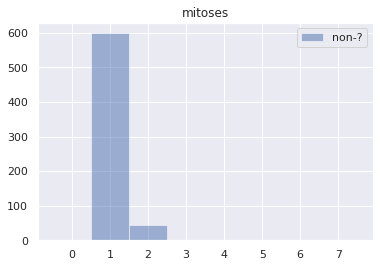

malignancy rate of single   id entries:
malignancy rate of multiple id entries:
None


In [183]:
# TBH, Ori told me that there are duplicate id's in the data, 
# so I need to look at that near the beginning of the analysis
print('Number of unique ids ',len(df['id'].unique()))
print('Number of data rows  ',len(df))

bins = np.linspace(-0.5, 7.5, 9)
plt.hist(df['id'].value_counts(), bins, alpha=0.5, label='non-?')
plt.legend(loc='upper right')
plt.title(var)
plt.show()

# quite honestly, I'm not sure what to do with multiple id's, so I'm just going to eliminate them for now.
# that's not a wonderful idea, since they are probably skewed towards malignancy; let's see:
print('malignancy rate of single   id entries:')
print('malignancy rate of multiple id entries:')

# and probably the solution is 
# to take the first occurance.  Actually, in absentia of additional information, let's just do that.

blub = df['id'].value_counts()
#print(blub.index.tolist())
#print(blub.values.tolist())
print(blub.get('1182404'))
# OK, this is taking way too long, so I'm just going to leave them in the data. 




In [184]:
dfweird = df[df['barenuclei']=='?']
dfx     = df[df['barenuclei']!='?']


The dimensions of the non-weird data is: (683, 11)
The dimensions of the weird     data is: (16, 11)


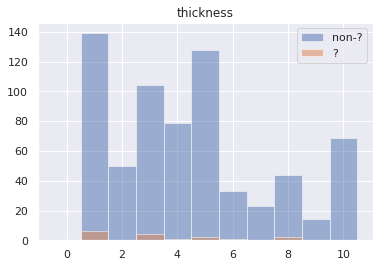

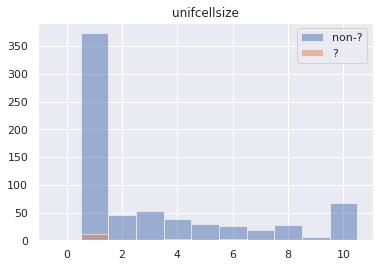

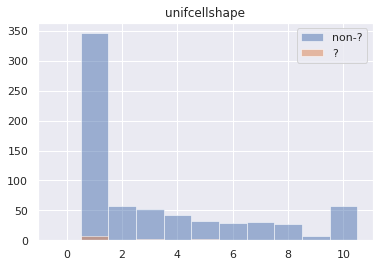

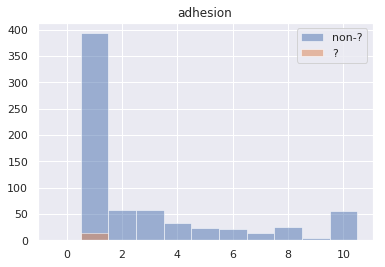

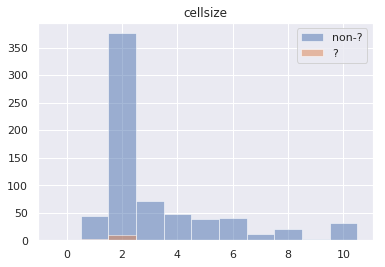

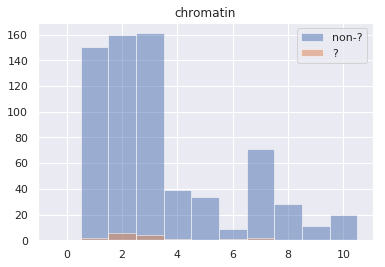

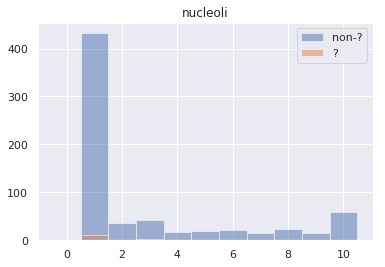

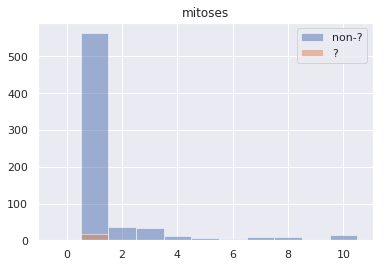

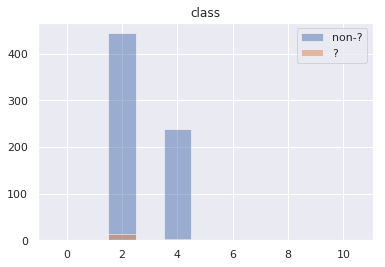

In [185]:
print('The dimensions of the non-weird data is:',dfx.shape)
print('The dimensions of the weird     data is:',dfweird.shape)

# We probably want to know if these records differ from the other data significantly
# make overlaying histograms
# lucky!  all variables go from 0 to 10! 
# if you wanted, you could see this with:
# df.min(axis=0)
# df.max(axis=0)
bins = np.linspace(-0.5, 10.5, 12)

for var in ['thickness', 'unifcellsize', 'unifcellshape', 'adhesion', 'cellsize', 'chromatin', 'nucleoli', 'mitoses', 'class']:
    plt.hist(dfx[var],     bins,  alpha=0.5, label='non-?')
    plt.hist(dfweird[var], bins,  alpha=0.5, label='?')
    plt.legend(loc='upper right')
    plt.title(var)
    plt.show()


In [186]:
print(dfweird)



          id  thickness  unifcellsize  unifcellshape  adhesion  cellsize  \
23   1057013          8             4              5         1         2   
40   1096800          6             6              6         9         6   
139  1183246          1             1              1         1         1   
145  1184840          1             1              3         1         2   
158  1193683          1             1              2         1         3   
164  1197510          5             1              1         1         2   
235  1241232          3             1              4         1         2   
249   169356          3             1              1         1         2   
275   432809          3             1              3         1         2   
292   563649          8             8              8         1         2   
294   606140          1             1              1         1         2   
297    61634          5             4              3         1         2   
315   704168

Just by inspection we can see that it's not really reasonable to simply exclude barenuclei == '?' data since they are greatly unbalanced towards the benign class; we will have to impute them somehow.  

In [187]:
print('included data:\n',dfx['class'].value_counts())
print('Excluded data:\n',dfweird['class'].value_counts())
print('Included data:\n',dfx['barenuclei'].value_counts())



included data:
 2    444
4    239
Name: class, dtype: int64
Excluded data:
 2    14
4     2
Name: class, dtype: int64
Included data:
 1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: barenuclei, dtype: int64


... so since the '?' data is skewed towards the '2' class, it's probably not a good idea to exclude it.  I think my approach (since it's the simplest) will be to simply re-assign that variable to the most common value, which is 1.



In [188]:
df['barenuclei']=df['barenuclei'].apply(lambda x: x if x != '?' else 1)
# Also, convert these to integers
df['barenuclei'] = df['barenuclei'].apply(pd.to_numeric)
# while we are at it, reassignt the classes: benign (2) -> 0; malignant (4) -> 1
df['class']=df['class'].apply(lambda x: 0 if x == 2 else 1)


OK!  Now that we've taken care of the weird data in some fashion ( a better approach would have been a regression or a KNN approach; perhaps we can go back and do that if we have time... see https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4 towards the bottom.)

next up, let's plot all the variables as histograms by the two classes

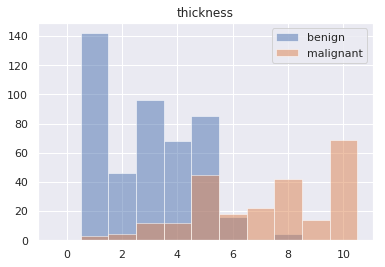

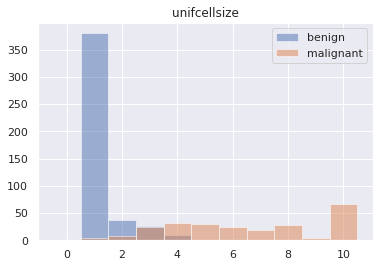

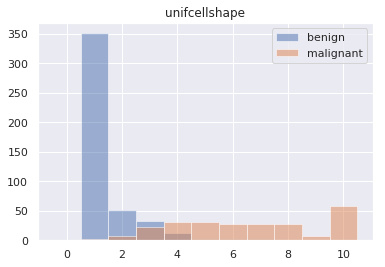

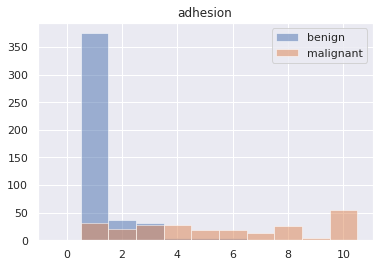

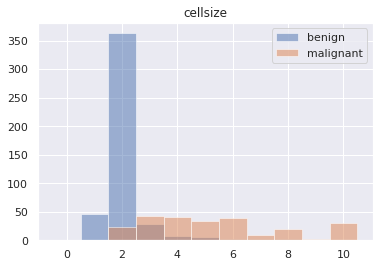

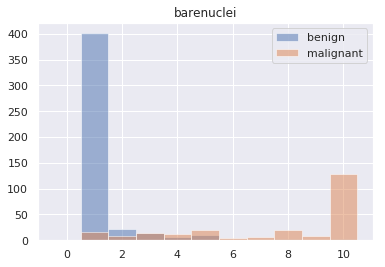

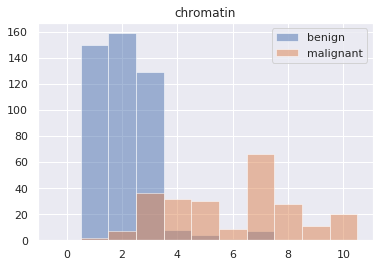

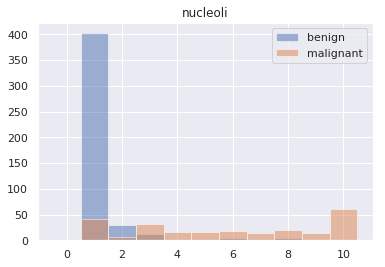

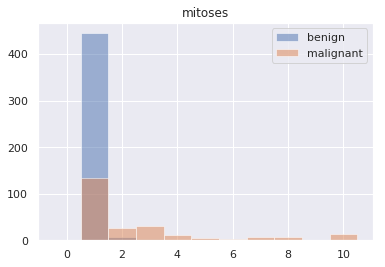

In [189]:
benignidx = df['class']==0
malignidx = df['class']==1
bins = np.linspace(-0.5, 10.5, 12)
for var in ['thickness', 'unifcellsize', 'unifcellshape', 'adhesion', 'cellsize', 'barenuclei', 'chromatin', 'nucleoli', 'mitoses']:
    plt.hist(df[var][benignidx],  bins, alpha=0.5, label='benign')
    plt.hist(df[var][malignidx],  bins, alpha=0.5, label='malignant')
    plt.legend(loc='upper right')
    plt.title(var)
    plt.show()

<H1>Variable correlations: Benign</H1>


/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


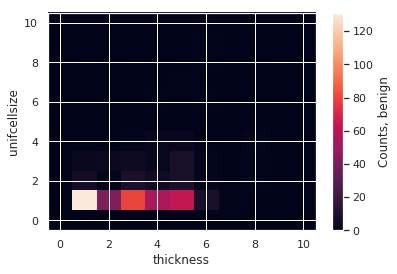

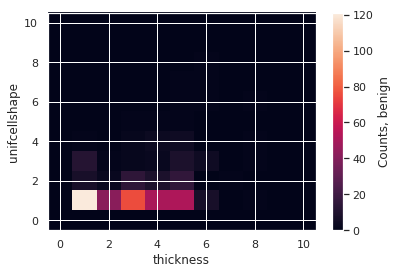

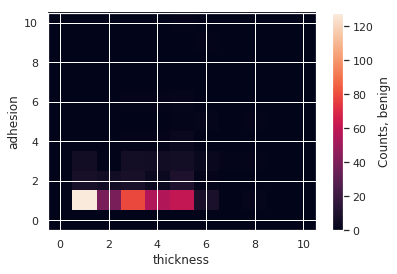

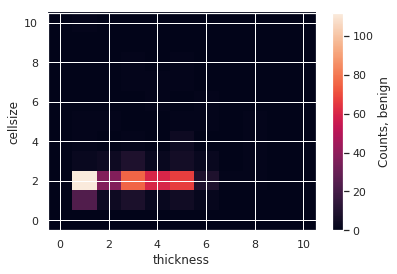

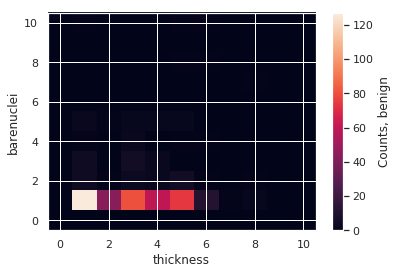

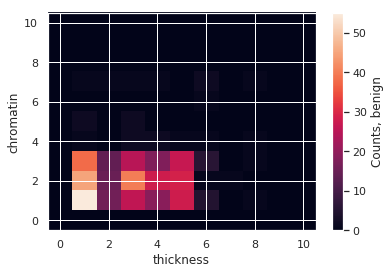

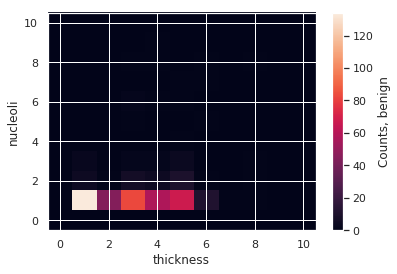

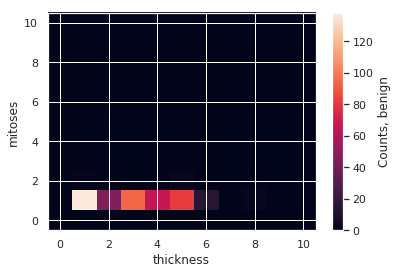

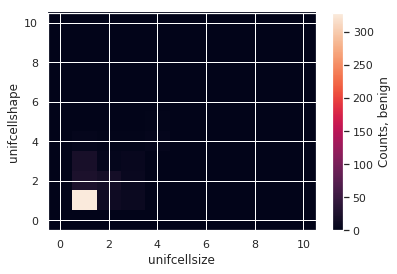

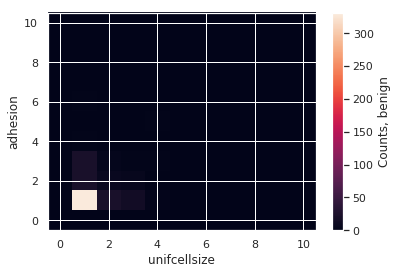

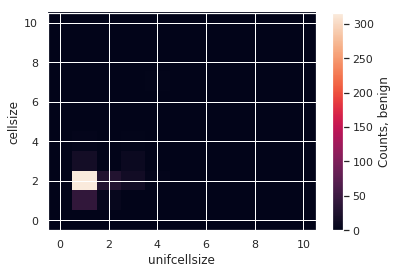

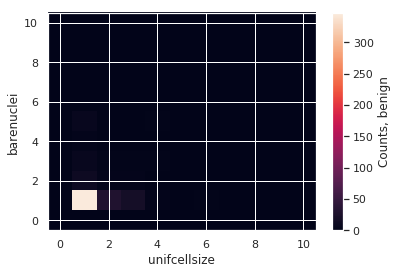

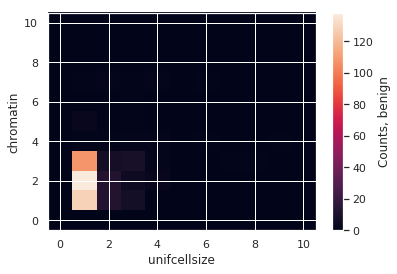

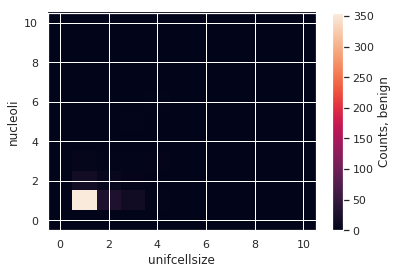

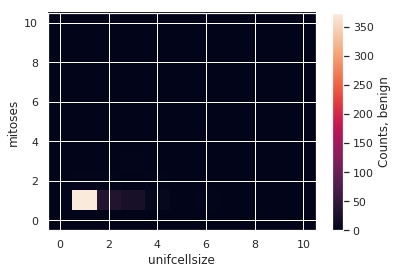

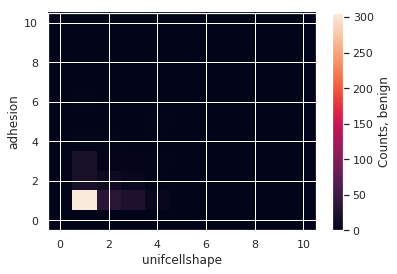

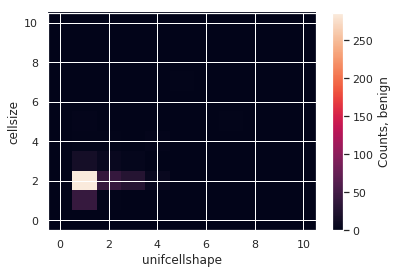

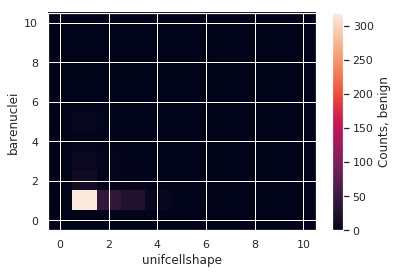

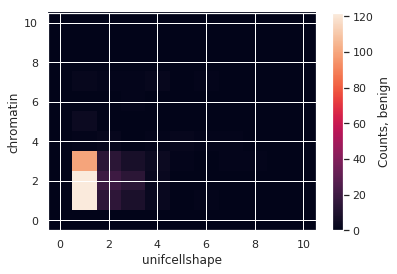

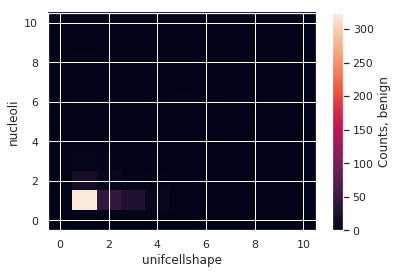

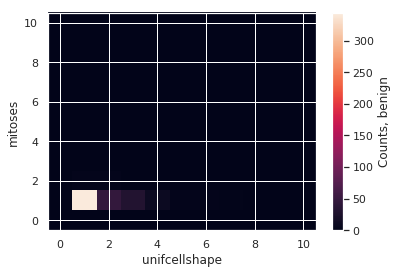

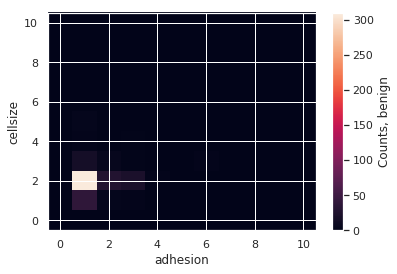

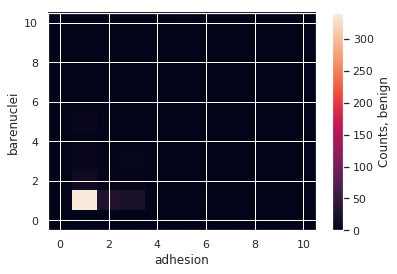

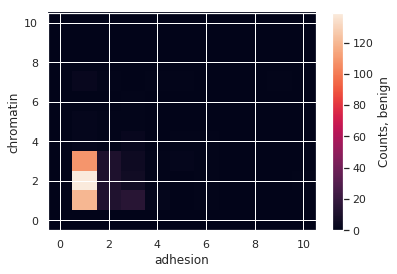

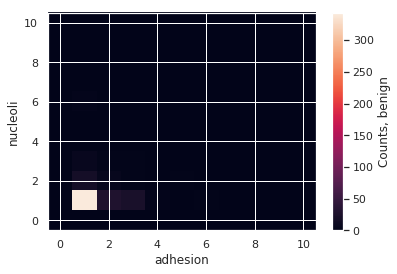

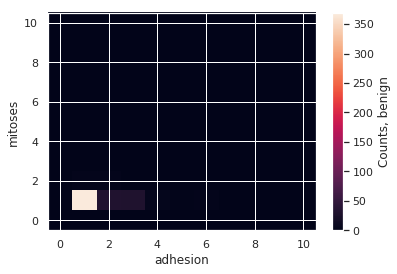

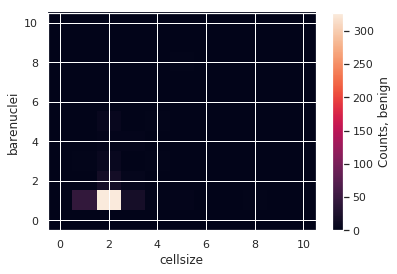

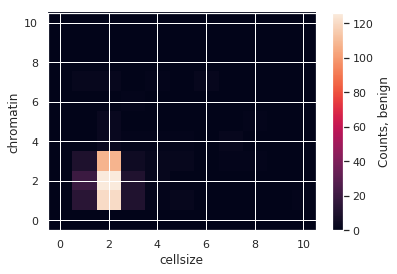

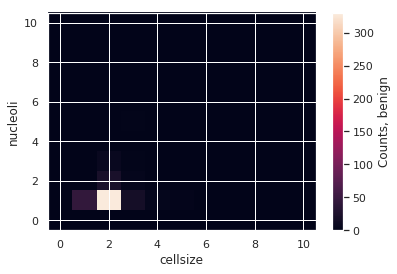

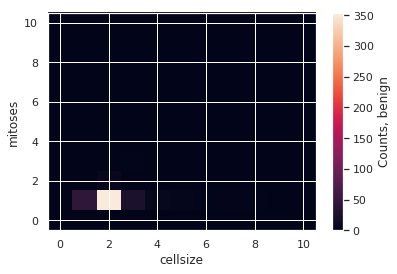

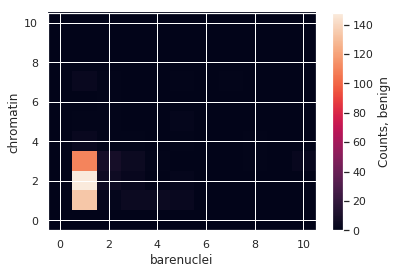

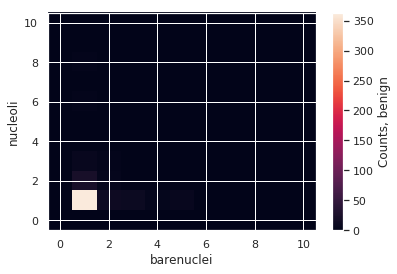

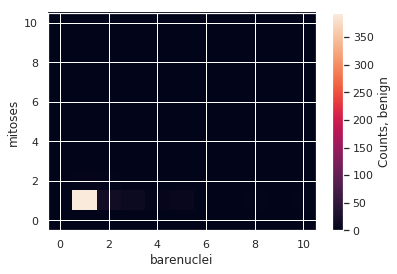

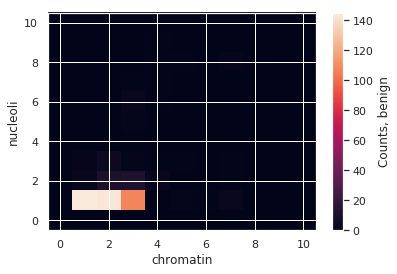

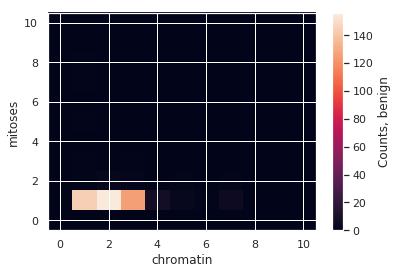

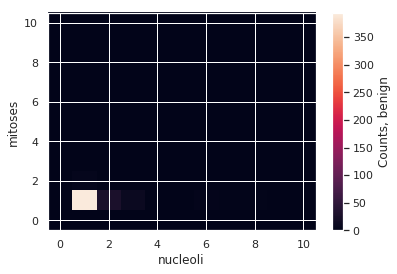

In [190]:
bins = np.linspace(-0.5, 10.5, 12)
variables = ['thickness', 'unifcellsize', 'unifcellshape', 'adhesion', 'cellsize', 'barenuclei', 'chromatin', 'nucleoli', 'mitoses']
nvar = len(vars)
for ivar1 in range(nvar):
    for ivar2 in range(ivar1+1,nvar):
        var1 = variables[ivar1]
        var2 = variables[ivar2]
        x = df[var1][benignidx]
        y = df[var2][benignidx]
        fig2 = plt.figure()
        plt.hist2d(x, y, bins=bins)
        plt.xlabel(var1)
        plt.ylabel(var2)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Counts, benign')

        
        

<H1>Variable correlations: Malignant</H1>


/home/topquirk67/anaconda3/envs/insight/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


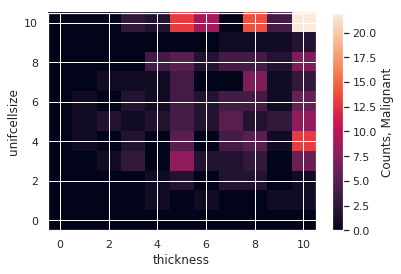

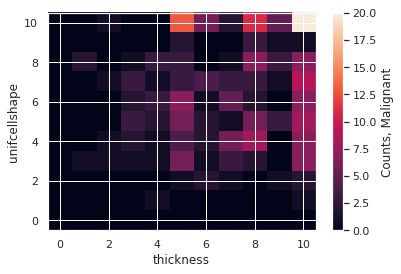

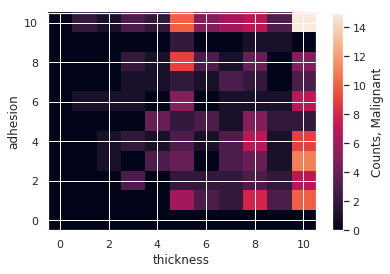

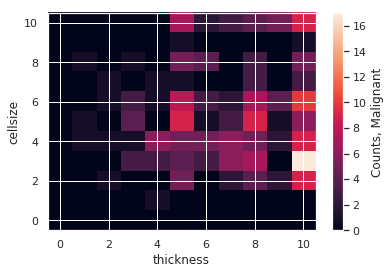

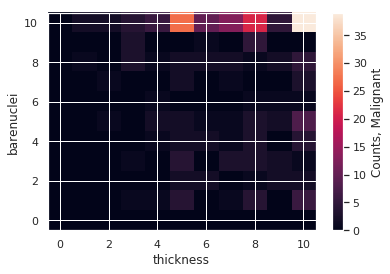

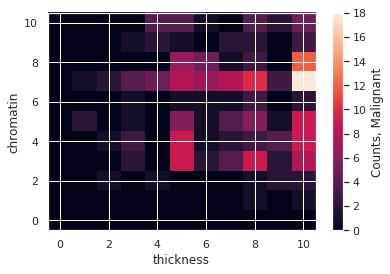

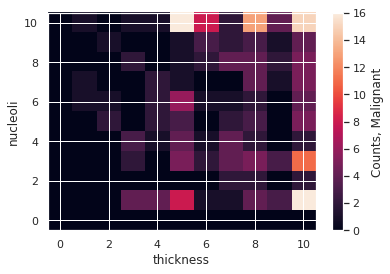

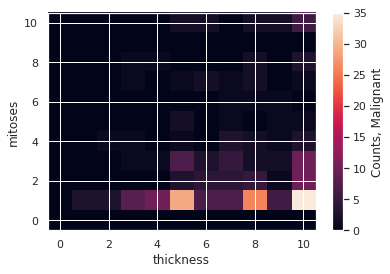

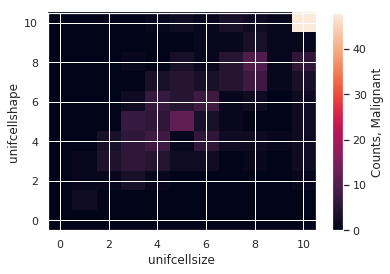

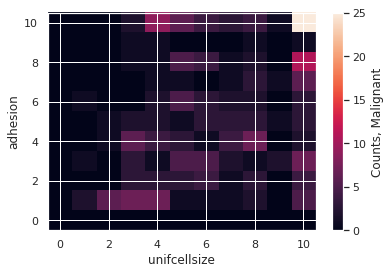

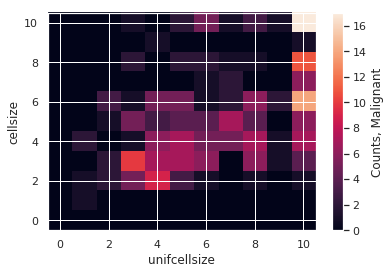

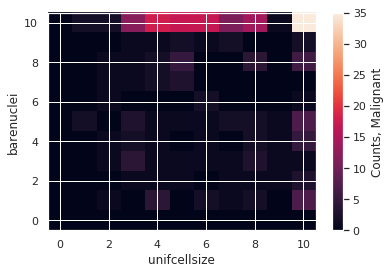

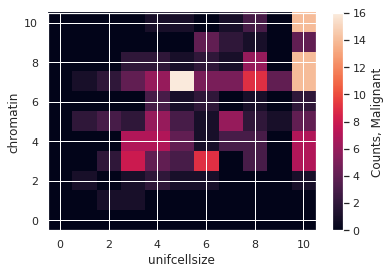

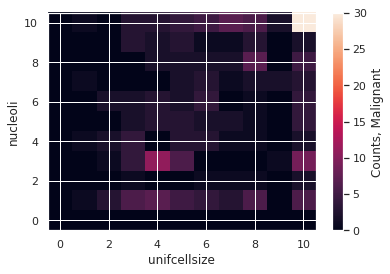

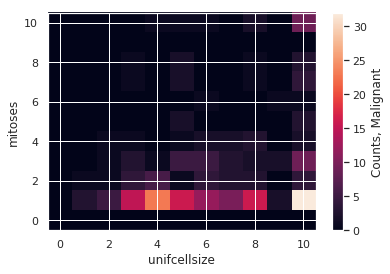

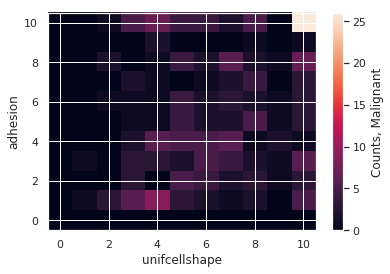

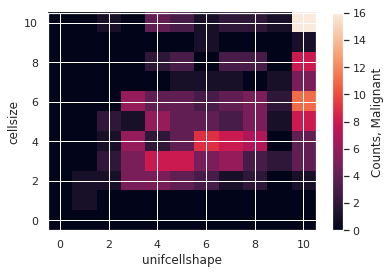

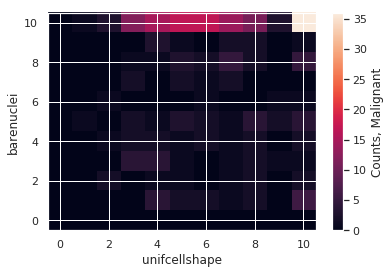

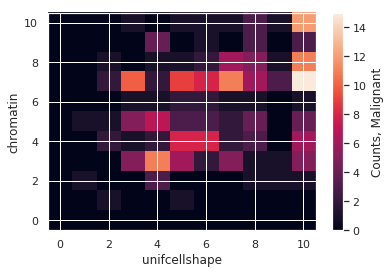

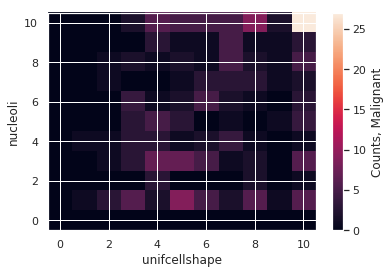

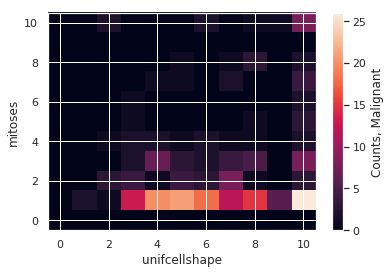

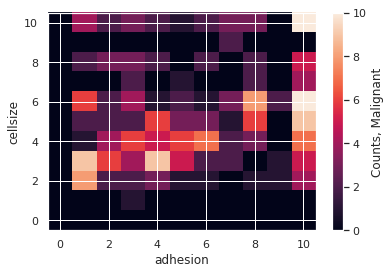

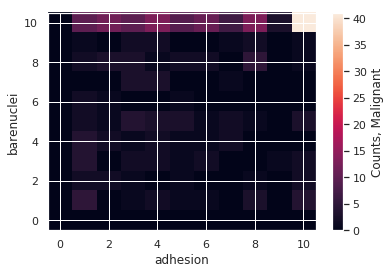

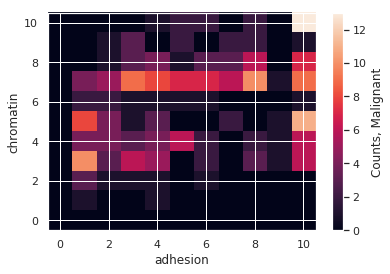

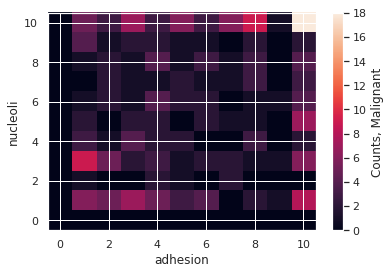

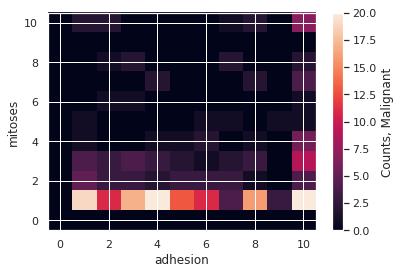

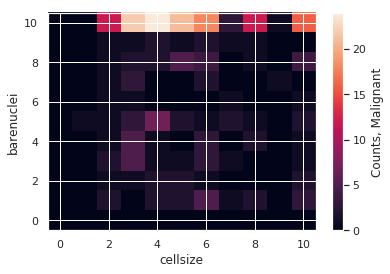

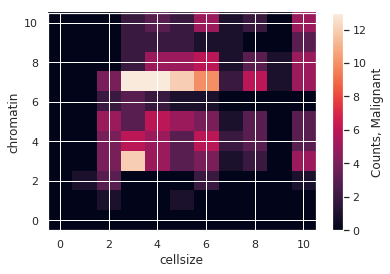

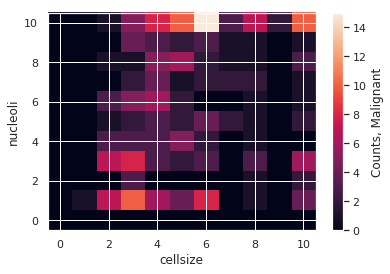

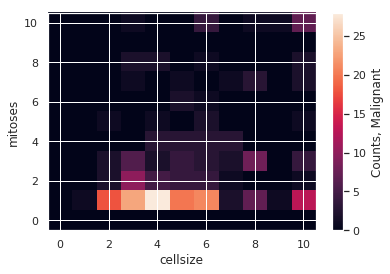

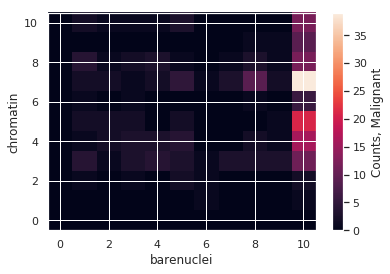

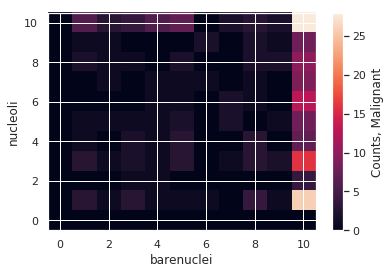

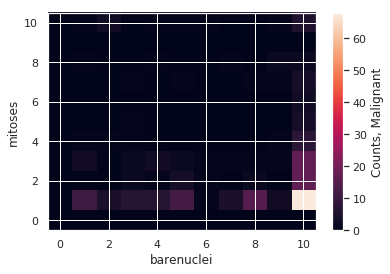

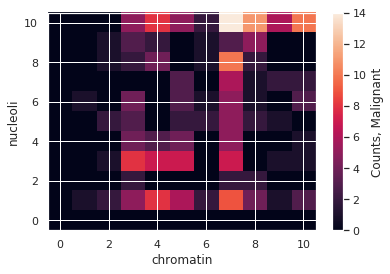

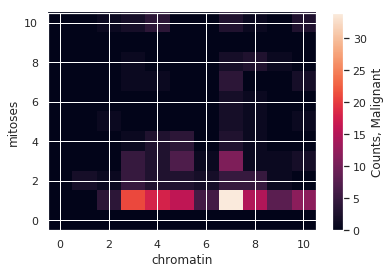

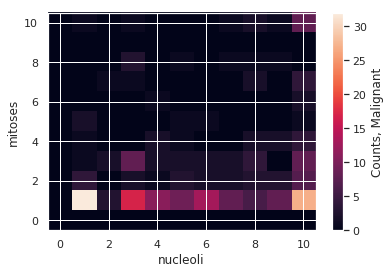

In [191]:
bins = np.linspace(-0.5, 10.5, 12)
variables = ['thickness', 'unifcellsize', 'unifcellshape', 'adhesion', 'cellsize', 'barenuclei', 'chromatin', 'nucleoli', 'mitoses']
nvar = len(vars)
for ivar1 in range(nvar):
    for ivar2 in range(ivar1+1,nvar):
        var1 = variables[ivar1]
        var2 = variables[ivar2]
        x = df[var1][malignidx]
        y = df[var2][malignidx]
        fig2 = plt.figure()
        plt.hist2d(x, y, bins=bins)
        plt.xlabel(var1)
        plt.ylabel(var2)
        cbar = plt.colorbar()
        cbar.ax.set_ylabel('Counts, Malignant')



Let's just create a by-hand classifier from these data and see how it does on the entire data set (obviously it would be better to do a test and training set, but this is just to get a baseline).

Eyeballing values; in all cases, if the condition is true, you get malignant.

thickness  > 2
uniformity > 2
adhesion   > 3
cellsize   > 3
barenuclei > 4
chromatin  > 3
nucleoli   > 2
mitoses    > 2



<H2>Conclusion!  The only vague collinearity is in unifcellsize and unifcellshape.  But it's not highly collinear.</H2>

In [192]:
simple_model_predictions = (df['thickness']>4)&(df['unifcellsize']>2)&(df['unifcellshape']>2)&(df['adhesion']>3)&(df['cellsize']>3)&(df['barenuclei']>4)&(df['chromatin']>3)&(df['nucleoli']>2)&(df['mitoses']>2)
print(confusion_matrix(df['class'], simple_model_predictions))
print(classification_report(df['class'], simple_model_predictions))

[[458   0]
 [212  29]]
             precision    recall  f1-score   support

          0       0.68      1.00      0.81       458
          1       1.00      0.12      0.21       241

avg / total       0.79      0.70      0.61       699



Now let's do a bit more to make a real model.  Start with a simple logistic regression (which should not be very good!), then try some linear programming as per the UW Notes from 1990; that means a decision tree, then maybe a random forest.





In [193]:
cols = ['thickness', 'unifcellsize', 'unifcellshape', 'adhesion', 'cellsize', 'barenuclei', 'chromatin', 'nucleoli', 'mitoses']
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(df[cols], y, test_size=0.3, random_state=0)

<h1>LOGISTIC REGRESSION</h1>


RESULTS: Logistic Regression Training Set
[[318   5]
 [  7 159]]
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       323
          1       0.97      0.96      0.96       166

avg / total       0.98      0.98      0.98       489

RESULTS: Logistic Regression Test Set
[[129   6]
 [  5  70]]
             precision    recall  f1-score   support

          0       0.96      0.96      0.96       135
          1       0.92      0.93      0.93        75

avg / total       0.95      0.95      0.95       210

[0.         0.93333333 1.        ] [0.         0.04444444 1.        ] [2 1 0]


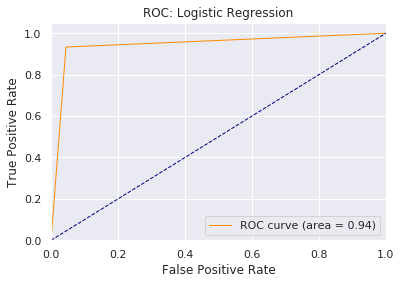

In [194]:
logreg = LogisticRegression()
lr_fit = logreg.fit(X_train, y_train)
print('RESULTS: Logistic Regression Training Set')
y_pred = logreg.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print('RESULTS: Logistic Regression Test Set')
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
print(tpr,fpr,thresholds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Logistic Regression')
plt.legend(loc="lower right")
plt.show()




<H1>Random Forest</H1>

RESULTS: Random Forest Training Set
[[323   0]
 [  0 166]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       323
          1       1.00      1.00      1.00       166

avg / total       1.00      1.00      1.00       489

RESULTS: Random Forest Test Set
[[128   7]
 [  4  71]]
             precision    recall  f1-score   support

          0       0.97      0.95      0.96       135
          1       0.91      0.95      0.93        75

avg / total       0.95      0.95      0.95       210

RESULTS: Iterated Random Forest Test Set


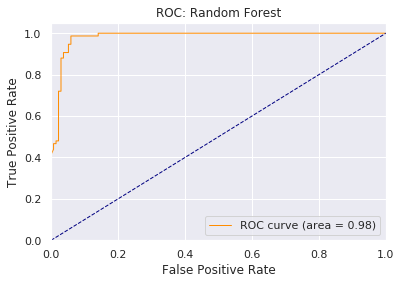

In [195]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rffit = rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
print('RESULTS: Random Forest Training Set')
y_pred = rffit.predict(X_train)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))
print('RESULTS: Random Forest Test Set')
y_pred = rffit.predict(X_test)
predictions = [round(value) for value in y_pred]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print('RESULTS: Iterated Random Forest Test Set')
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC: Random Forest')
plt.legend(loc="lower right")
plt.show()





Next step in the model is to tune the TPR and FPR tuned to actual health outcomes.  What you really want is to have is a model that:

1) identifies as many cancers as possible (TPR); a missed cancer diagnoisis can be fatal and time is usually of the essence

2) could have a higher FPR as long as we can go back and re-test.  Although it's scary to get a possible cancer diagnosis that turns out to be false, that fear is outweighed by the risk to cancer patients.  

Social issues to consider in optimizing the threshold would include physician training to deal with false positives, additional testing (and its cost) to deal with false positives, and better understanding of the followup procedures for negative tests.  For example, if we are testing once a year, and that year does not significantly affect the prognosis of a missed diagnosis, then we do NOT need to favor the TPR.